### Baseline Model Using the Mean

A simple **baseline model** for time series forecasting can use the **mean** of the historical data as the prediction for all future values.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# To read data and specify column names
df = pd.read_csv("../data/BTC_USDT.csv", names=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

# To convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')

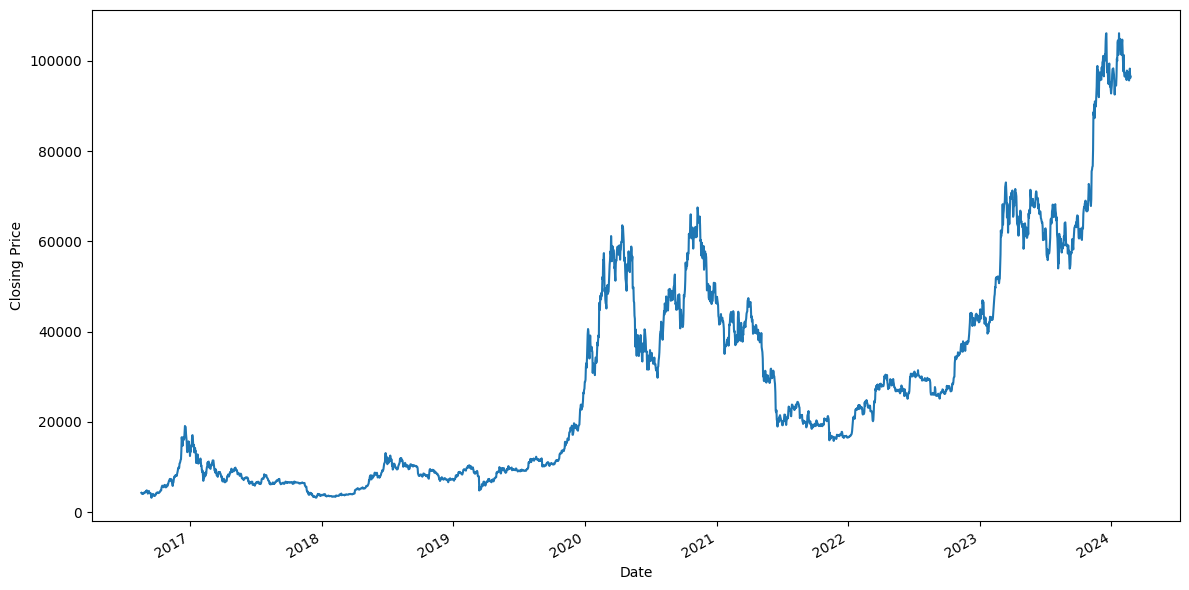

In [4]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['Timestamp'], df['Close'])

# Label the axes
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')

# Set x-ticks at yearly intervals
years = pd.date_range(df['Timestamp'].min(), df['Timestamp'].max(), freq='Y')
ax.set_xticks(years)

# Format x-tick labels
ax.set_xticklabels([year.year for year in years], rotation=45)

# Automatically format the x-axis date labels
fig.autofmt_xdate()

# Adjust layout
plt.tight_layout()
plt.show()

## Train/test split

In [5]:
train = df[:-365]
test = df[-365:]

### Baseline 1: Predict the mean

In [6]:
pred_df = test.copy()

pred_df['mean'] = np.mean(train['Close'])

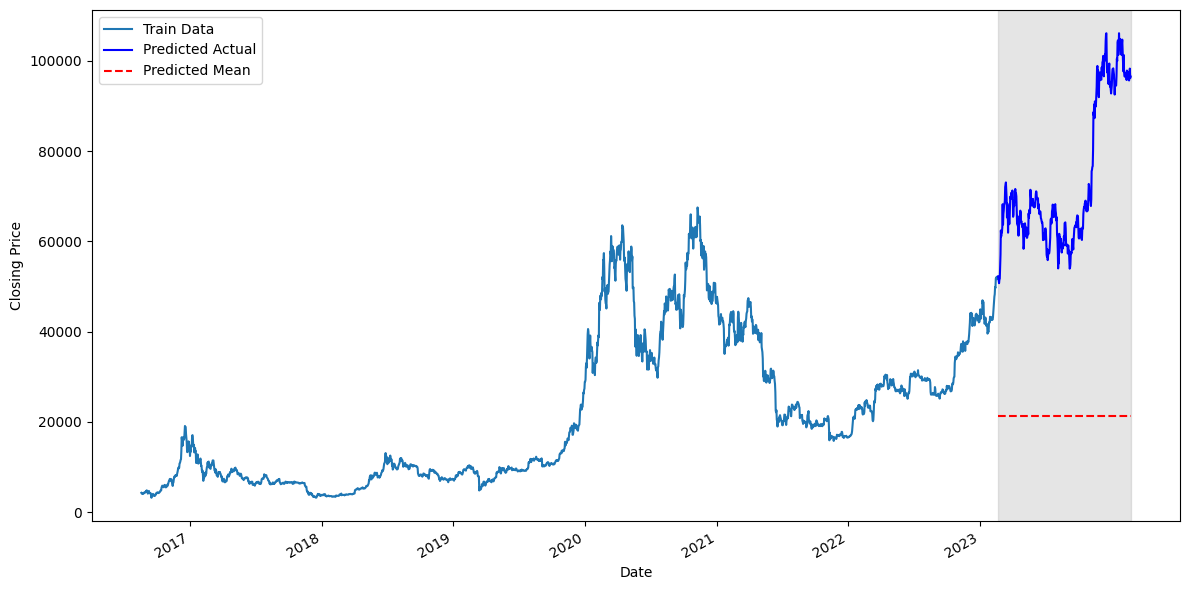

In [8]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual and predicted data
ax.plot(train['Timestamp'], train['Close'], label='Train Data')
ax.plot(pred_df['Timestamp'], pred_df['Close'], 'b-', label='Predicted Actual')
ax.plot(pred_df['Timestamp'], pred_df['mean'], 'r--', label='Predicted Mean')

# Label the axes
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')

# Set x-ticks at yearly intervals based on 'Timestamp' from train DataFrame
years = pd.date_range(train['Timestamp'].min(), train['Timestamp'].max(), freq='Y')
ax.set_xticks(years)

# Format x-tick labels
ax.set_xticklabels([year.year for year in years], rotation=45)

# Add gray box over the last 365 rows (adjusting for the number of rows in the train DataFrame)
last_365_start = len(df) - 365  # Start index for the last 365 rows

# Ensure the range is within bounds and create the gray box
if last_365_start >= 0:
    ax.axvspan(df['Timestamp'].iloc[last_365_start], df['Timestamp'].iloc[-1], color='#808080', alpha=0.2)

# Automatically format the x-axis date labels
fig.autofmt_xdate()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot with legend
plt.legend()
plt.show()

### Baseline 2: Predict last year's mean

In [9]:
pred_df['mean_last_year'] = np.mean(train['Close'][-365:])

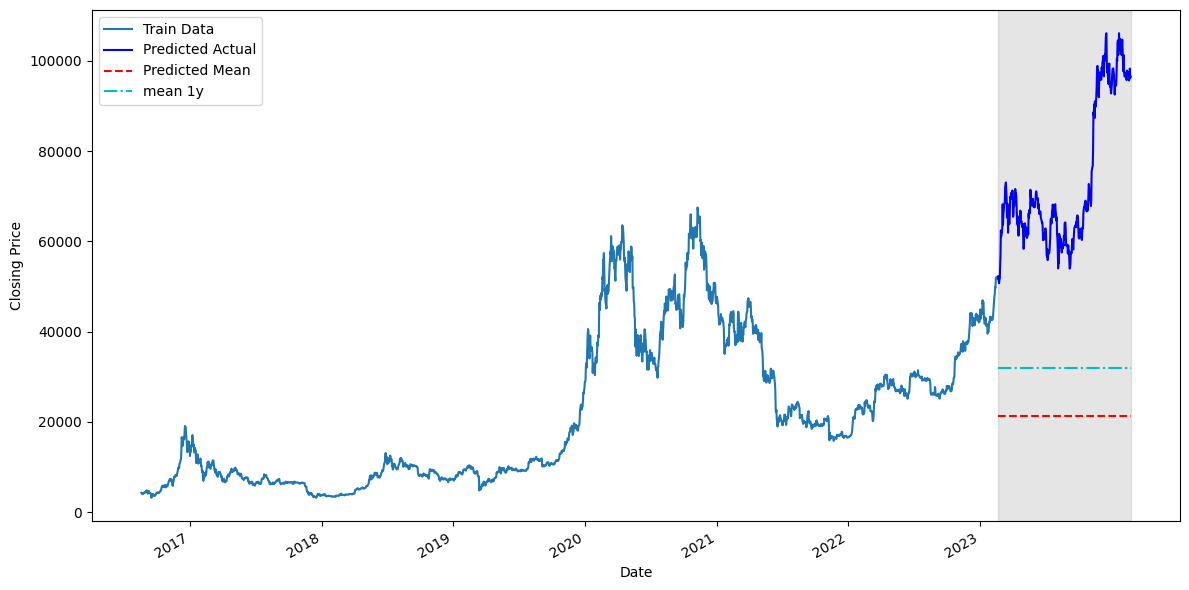

In [10]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual and predicted data
ax.plot(train['Timestamp'], train['Close'], label='Train Data')
ax.plot(pred_df['Timestamp'], pred_df['Close'], 'b-', label='Predicted Actual')
ax.plot(pred_df['Timestamp'], pred_df['mean'], 'r--', label='Predicted Mean')
ax.plot(pred_df['Timestamp'], pred_df['mean_last_year'], 'c-.', label='mean 1y')

# Label the axes
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')

# Set x-ticks at yearly intervals based on 'Timestamp' from train DataFrame
years = pd.date_range(train['Timestamp'].min(), train['Timestamp'].max(), freq='Y')
ax.set_xticks(years)

# Format x-tick labels
ax.set_xticklabels([year.year for year in years], rotation=45)

# Add gray box over the last 365 rows (adjusting for the number of rows in the train DataFrame)
last_365_start = len(df) - 365  # Start index for the last 365 rows

# Ensure the range is within bounds and create the gray box
if last_365_start >= 0:
    ax.axvspan(df['Timestamp'].iloc[last_365_start], df['Timestamp'].iloc[-1], color='#808080', alpha=0.2)

# Automatically format the x-axis date labels
fig.autofmt_xdate()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot with legend
plt.legend()
plt.show()

### Baseline 3: Predict the last known value

In [11]:
pred_df['last'] = train['Close'].iloc[-30]

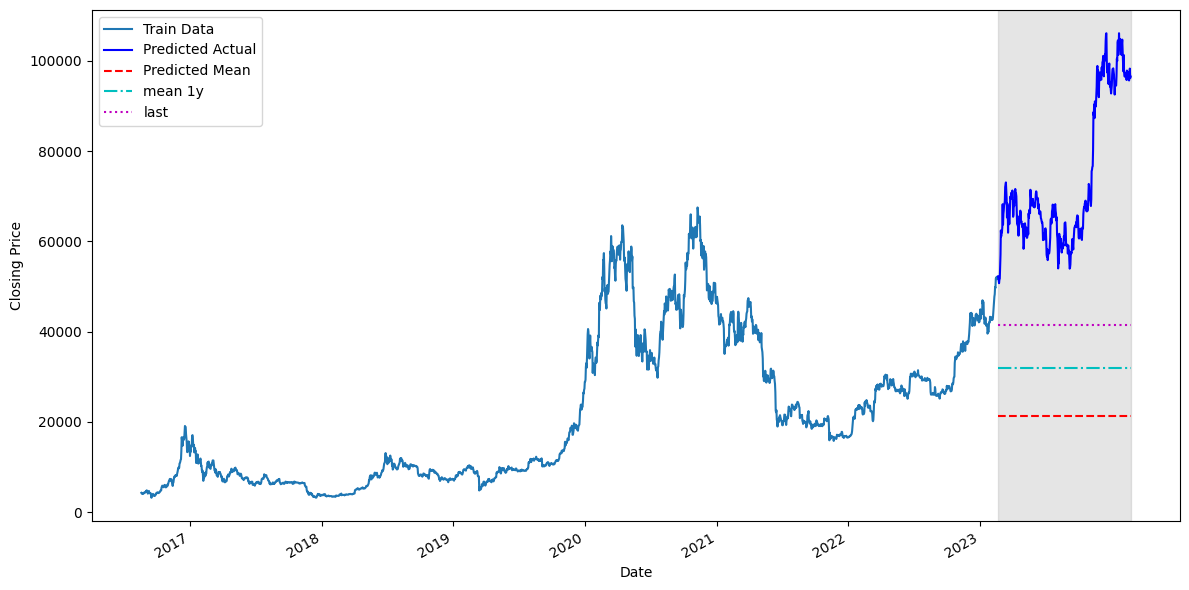

In [12]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual and predicted data
ax.plot(train['Timestamp'], train['Close'], label='Train Data')
ax.plot(pred_df['Timestamp'], pred_df['Close'], 'b-', label='Predicted Actual')
ax.plot(pred_df['Timestamp'], pred_df['mean'], 'r--', label='Predicted Mean')
ax.plot(pred_df['Timestamp'], pred_df['mean_last_year'], 'c-.', label='mean 1y')
ax.plot(pred_df['Timestamp'], pred_df['last'], 'm:', label='last')

# Label the axes
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')

# Set x-ticks at yearly intervals based on 'Timestamp' from train DataFrame
years = pd.date_range(train['Timestamp'].min(), train['Timestamp'].max(), freq='Y')
ax.set_xticks(years)

# Format x-tick labels
ax.set_xticklabels([year.year for year in years], rotation=45)

# Add gray box over the last 365 rows (adjusting for the number of rows in the train DataFrame)
last_365_start = len(df) - 365  # Start index for the last 365 rows

# Ensure the range is within bounds and create the gray box
if last_365_start >= 0:
    ax.axvspan(df['Timestamp'].iloc[last_365_start], df['Timestamp'].iloc[-1], color='#808080', alpha=0.2)

# Automatically format the x-axis date labels
fig.autofmt_xdate()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot with legend
plt.legend()
plt.show()

### Baseline 4: Predict the last season

In [13]:
pred_df['last_season'] = train['Close'][-365:].values

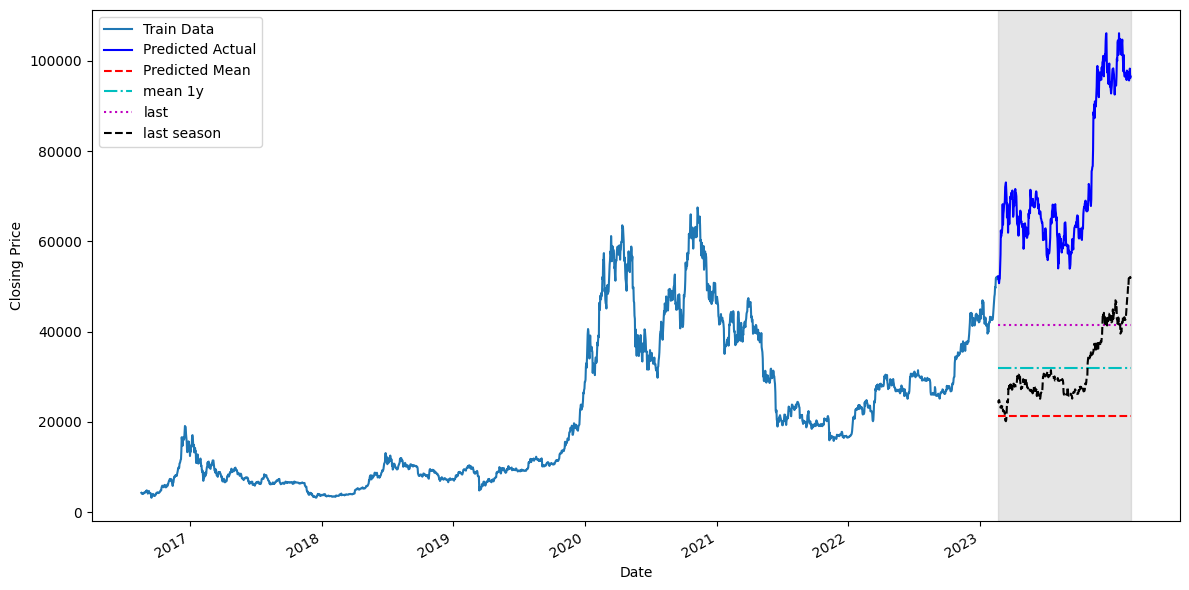

In [14]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual and predicted data
ax.plot(train['Timestamp'], train['Close'], label='Train Data')
ax.plot(pred_df['Timestamp'], pred_df['Close'], 'b-', label='Predicted Actual')
ax.plot(pred_df['Timestamp'], pred_df['mean'], 'r--', label='Predicted Mean')
ax.plot(pred_df['Timestamp'], pred_df['mean_last_year'], 'c-.', label='mean 1y')
ax.plot(pred_df['Timestamp'], pred_df['last'], 'm:', label='last')
ax.plot(pred_df['Timestamp'], pred_df['last_season'], 'k--', label='last season')

# Label the axes
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')

# Set x-ticks at yearly intervals based on 'Timestamp' from train DataFrame
years = pd.date_range(train['Timestamp'].min(), train['Timestamp'].max(), freq='Y')
ax.set_xticks(years)

# Format x-tick labels
ax.set_xticklabels([year.year for year in years], rotation=45)

# Add gray box over the last 365 rows (adjusting for the number of rows in the train DataFrame)
last_365_start = len(df) - 365  # Start index for the last 365 rows

# Ensure the range is within bounds and create the gray box
if last_365_start >= 0:
    ax.axvspan(df['Timestamp'].iloc[last_365_start], df['Timestamp'].iloc[-1], color='#808080', alpha=0.2)

# Automatically format the x-axis date labels
fig.autofmt_xdate()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot with legend
plt.legend()
plt.show()

In [15]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100,2)

In [16]:
mape_mean = mape(pred_df['Close'], pred_df['mean'])
mape_mean_1y = mape(pred_df['Close'], pred_df['mean_last_year'])
mape_last = mape(pred_df['Close'], pred_df['last'])
mape_last_season = mape(pred_df['Close'], pred_df['last_season'])

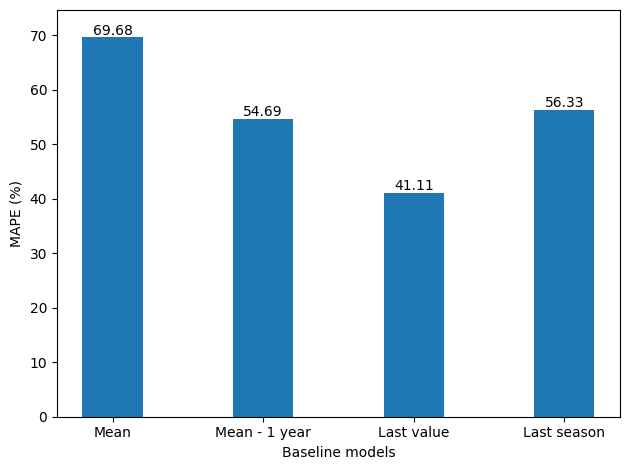

In [17]:
fig, ax = plt.subplots()

x = ['Mean', 'Mean - 1 year', 'Last value', 'Last season']
y = [mape_mean, mape_mean_1y, mape_last, mape_last_season]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baseline models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, max(y) + 5)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.5, s=str(value), ha='center')
    
plt.tight_layout()